## Concise: 1: Start and mesh
Author: yanjun zhang, Source from book "Abali - 2017 - Computational Reality" P119

In [1]:
from disc_f import *

# mesh-size, contact area coefficient
mesh_min, mesh_max = 3, 20
c_contact          = 1
# Each time step rotation angular, and acc during lag, 1 is full acc, 0 is no acc.
angular_r          = 2240
v_vehicle, c_acc   = 160, 1
z1,z2,z3,z_all     = 20,33,30,8
pad_v_tag          = 32
# calling local functions to get all parameters
(dt, P, g, num_steps, h, radiation, v_angular, Ti, Tm, S_rub_circle, t, rho, c, k, t_brake, 
S_total,) = vehicle_initial (angular_r, v_vehicle, c_contact, c_acc)
print("1: Total braking tims is ", round(sum(dt), 2), "s")
print("2: Total numb steps is ", num_steps)

## here use lots of abbreviation, details are in disc_f
domain, cell_markers, facet_amrkers, mesh_name, mesh_name1, mesh_name2 \
                       = mesh_brake_all(mesh_min,mesh_max,pad_v_tag)
V, T_init, u_n         = initial_u_n(domain, Ti)
fdim, bc, mesh_brake, all_e,xdmf, x_co, y_co, ds, b_con \
                       = mesh_setup(domain, V,mesh_name1,num_steps, \
                         angular_r, mesh_name2, c_contact,z_all,Tm, S_rub_circle)
# Initialize
problem,u,v,f,n_vector = variation_initial(V, T_init,domain, rho, c, b_con,\
                          radiation, h, k, xdmf,dt,ds,u_n, Tm,g,bc);
n,converged = solver_setup_solve(problem,u)
## Visualization of time dependent problem using pyvista
gif_name    = "T-s-{}-d-{}-{}-c-{}-e-{}.gif".format(num_steps, angular_r, mesh_name2, c_contact, all_e)
plotter, sargs, renderer, warped, viridis, grid = plot_gif(V,u,gif_name)
##solve
T_array     = solve_heat(Ti, u, num_steps, dt, x_co, y_co, angular_r,t_brake, \
                     domain,S_rub_circle,fdim, rho, c, v, radiation, k, h, \
                     f,Tm,u_n,g, ds, xdmf, b_con,bc,plotter,warped)
csv_name    = "Result_T-s-{}-d-{}-{}-c-{}-e-{}.csv".format(num_steps, angular_r, mesh_name2, c_contact, all_e  )
# got the Temperature data
save_t_T(csv_name, T_array)

DOLFINx version: 0.8.0
Simulation environment setup complete.
1: Total braking tims is  48.05 s
2: Total numb steps is  62
The file 'm-3-20.msh' exists, start creat now:
Info    : Reading 'm-3-20.msh'...
Info    : 168 entities
Info    : 2532 nodes
Info    : 8476 elements
Info    : Done reading 'm-3-20.msh'



2024-10-21 18:00:04.107 (   5.497s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:04.120 (   5.510s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:04.124 (   5.515s) [main            ]       NewtonSolver.cpp:38    INFO| Newton iteration 2: r (abs) = 0.00665958 (tol = 1e-10) r (rel) = 2.20572e-06(tol = 1e-06)
2024-10-21 18:00:04.129 (   5.520s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:04.132 (   5.523s) [main            ]       NewtonSolver.cpp:38    INFO| Newton iteration 3: r (abs) = 3.66733e-08 (tol = 1e-10) r (rel) = 1.21466e-11(tol = 1e-06)
2024-10-21 18:00:04.133 (   5.524s) [main            ]       NewtonSolver.cpp:252   INFO| Newton solver finished in 3 iterations and 15 linear solver iterations.


1: Rotation has applied for 2240 degree. 2: Current time is 0.4 s. 3: Completion is 0.8 %. 

2024-10-21 18:00:07.307 (   8.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:07.307 (   8.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:07.307 (   8.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (0,0)
2024-10-21 18:00:07.308 (   8.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:07.308 (   8.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:07.308 (   8.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (0,0)
2024-10-21 18:00:07.308 (   8.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:07.308 (   8.699s) [main            ]topologycomputation.cpp:799   INFO| Requesting con

1: Completion is 0.8 %. 

2024-10-21 18:00:08.381 (   9.772s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:08.381 (   9.772s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:08.382 (   9.772s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:08.382 (   9.772s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:08.383 (   9.774s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:08.388 (   9.778s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:08.401 (   9.791s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:08.416 (   9.807s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 4480 degree. 2: Current time is 0.8 s. 3: Completion is 1.7 %. 

2024-10-21 18:00:08.631 (  10.021s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:08.631 (  10.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:08.631 (  10.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (0,0)
2024-10-21 18:00:08.631 (  10.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:08.631 (  10.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:08.631 (  10.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (0,0)
2024-10-21 18:00:08.631 (  10.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:08.631 (  10.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting con

1: Rotation has applied for 6720 degree. 2: Current time is 1.2 s. 3: Completion is 2.5 %. 

2024-10-21 18:00:10.188 (  11.578s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:10.188 (  11.579s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:10.189 (  11.580s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:10.189 (  11.580s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:10.190 (  11.581s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:10.193 (  11.583s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:10.200 (  11.590s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:10.214 (  11.604s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 8960 degree. 2: Current time is 1.6 s. 3: Completion is 3.3 %. 

2024-10-21 18:00:11.788 (  13.178s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:11.788 (  13.178s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:11.788 (  13.179s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:11.788 (  13.179s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:11.789 (  13.179s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:11.793 (  13.183s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:11.798 (  13.189s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:11.818 (  13.209s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 11200 degree. 2: Current time is 2.1 s. 3: Completion is 4.2 %. 

2024-10-21 18:00:13.134 (  14.524s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:13.134 (  14.524s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:13.134 (  14.525s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:13.134 (  14.525s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:13.135 (  14.526s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:13.139 (  14.529s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:13.147 (  14.537s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:13.161 (  14.552s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 13440 degree. 2: Current time is 2.5 s. 3: Completion is 5.1 %. 

2024-10-21 18:00:14.239 (  15.629s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:14.239 (  15.629s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:14.239 (  15.630s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:14.239 (  15.630s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:14.240 (  15.630s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:14.243 (  15.634s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:14.251 (  15.642s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:14.268 (  15.659s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 15680 degree. 2: Current time is 2.9 s. 3: Completion is 5.9 %. 

2024-10-21 18:00:15.312 (  16.702s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:15.312 (  16.702s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:15.312 (  16.703s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:15.312 (  16.703s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:15.313 (  16.703s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:15.316 (  16.707s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:15.323 (  16.713s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:15.335 (  16.726s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 17920 degree. 2: Current time is 3.3 s. 3: Completion is 6.8 %. 

2024-10-21 18:00:16.584 (  17.975s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:16.585 (  17.975s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:16.585 (  17.976s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:16.585 (  17.976s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:16.586 (  17.976s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:16.589 (  17.979s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:16.592 (  17.985s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:16.614 (  18.005s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 20160 degree. 2: Current time is 3.8 s. 3: Completion is 7.7 %. 

2024-10-21 18:00:17.631 (  19.021s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:17.631 (  19.021s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:17.631 (  19.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:17.632 (  19.022s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:17.633 (  19.023s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:17.636 (  19.027s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:17.643 (  19.033s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:17.656 (  19.046s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 22400 degree. 2: Current time is 4.2 s. 3: Completion is 8.6 %. 

2024-10-21 18:00:18.778 (  20.171s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:18.781 (  20.172s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:18.782 (  20.172s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:18.782 (  20.172s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:18.782 (  20.173s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:18.785 (  20.176s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:18.792 (  20.183s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:18.803 (  20.196s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 24640 degree. 2: Current time is 4.7 s. 3: Completion is 9.5 %. 

2024-10-21 18:00:19.834 (  21.224s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:19.834 (  21.225s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:19.835 (  21.225s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:19.835 (  21.225s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:19.835 (  21.226s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:19.839 (  21.229s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:19.845 (  21.235s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:19.858 (  21.248s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 26880 degree. 2: Current time is 5.1 s. 3: Completion is 10.4 %. 

2024-10-21 18:00:20.840 (  22.230s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:20.840 (  22.231s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:20.840 (  22.231s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:20.841 (  22.231s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:20.841 (  22.232s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:20.845 (  22.235s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:20.851 (  22.242s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:20.860 (  22.251s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 29120 degree. 2: Current time is 5.6 s. 3: Completion is 11.3 %. 

2024-10-21 18:00:22.217 (  23.607s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:22.217 (  23.607s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:22.224 (  23.615s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:22.224 (  23.615s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:22.228 (  23.619s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:22.240 (  23.630s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:22.257 (  23.647s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:22.294 (  23.685s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 31360 degree. 2: Current time is 6.0 s. 3: Completion is 12.3 %. 

2024-10-21 18:00:23.672 (  25.063s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:23.673 (  25.063s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:23.673 (  25.064s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:23.673 (  25.064s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:23.674 (  25.065s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:23.677 (  25.068s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:23.685 (  25.075s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:23.698 (  25.089s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 33600 degree. 2: Current time is 6.5 s. 3: Completion is 13.2 %. 

2024-10-21 18:00:24.855 (  26.278s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:24.888 (  26.278s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:24.888 (  26.279s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:24.888 (  26.279s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:24.889 (  26.279s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:24.892 (  26.283s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:24.899 (  26.290s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:24.912 (  26.303s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 35840 degree. 2: Current time is 6.9 s. 3: Completion is 14.2 %. 

2024-10-21 18:00:26.270 (  27.660s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:26.270 (  27.660s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:26.271 (  27.661s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:26.271 (  27.661s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:26.272 (  27.662s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:26.275 (  27.666s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:26.285 (  27.676s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:26.311 (  27.702s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 38080 degree. 2: Current time is 7.4 s. 3: Completion is 15.1 %. 

2024-10-21 18:00:27.305 (  28.696s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:27.305 (  28.696s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:27.306 (  28.697s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:27.306 (  28.697s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:27.308 (  28.698s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:27.313 (  28.703s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:27.323 (  28.713s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:27.335 (  28.726s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 40320 degree. 2: Current time is 7.9 s. 3: Completion is 16.1 %. 

2024-10-21 18:00:28.402 (  29.792s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:28.402 (  29.792s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:28.403 (  29.794s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:28.403 (  29.794s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:28.406 (  29.796s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:28.410 (  29.800s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:28.416 (  29.807s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:28.429 (  29.820s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 42560 degree. 2: Current time is 8.4 s. 3: Completion is 17.1 %. 

2024-10-21 18:00:29.438 (  30.829s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:29.438 (  30.829s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:29.439 (  30.829s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:29.439 (  30.829s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:29.439 (  30.829s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:29.442 (  30.832s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:29.450 (  30.842s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:29.466 (  30.857s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 44800 degree. 2: Current time is 8.9 s. 3: Completion is 18.1 %. 

2024-10-21 18:00:30.919 (  32.309s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:30.920 (  32.310s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:30.920 (  32.311s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:30.920 (  32.311s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:30.921 (  32.312s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:30.925 (  32.315s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:30.931 (  32.321s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:30.946 (  32.337s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 47040 degree. 2: Current time is 9.3 s. 3: Completion is 19.1 %. 

2024-10-21 18:00:32.405 (  33.795s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:32.405 (  33.796s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:32.406 (  33.796s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:32.406 (  33.796s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:32.407 (  33.798s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:32.411 (  33.801s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:32.419 (  33.810s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:32.438 (  33.829s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 49280 degree. 2: Current time is 9.8 s. 3: Completion is 20.1 %. 

2024-10-21 18:00:33.782 (  35.172s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:33.782 (  35.173s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:33.783 (  35.173s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:33.783 (  35.173s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:33.784 (  35.174s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:33.787 (  35.178s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:33.793 (  35.187s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:33.812 (  35.202s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 51520 degree. 2: Current time is 10.4 s. 3: Completion is 21.1 %. 

2024-10-21 18:00:35.173 (  36.564s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:35.173 (  36.564s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:35.174 (  36.564s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:35.174 (  36.564s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:35.175 (  36.566s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:35.179 (  36.569s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:35.187 (  36.578s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:35.216 (  36.607s) [main            ]              petsc.cpp:700   INFO| PETS

1: Completion is 21.1 %. 

2024-10-21 18:00:36.742 (  38.136s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:36.746 (  38.136s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:36.749 (  38.140s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:36.749 (  38.140s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:36.766 (  38.156s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:36.770 (  38.160s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:36.783 (  38.174s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:36.815 (  38.205s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 53760 degree. 2: Current time is 10.9 s. 3: Completion is 22.2 %. 

2024-10-21 18:00:37.021 (  38.412s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:37.029 (  38.419s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:37.029 (  38.421s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (0,0)
2024-10-21 18:00:37.035 (  38.425s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:37.042 (  38.433s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:37.042 (  38.433s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (0,0)
2024-10-21 18:00:37.043 (  38.433s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (0,0)
2024-10-21 18:00:37.043 (  38.433s) [main            ]topologycomputation.cpp:799   INFO| Requesting con

1: Rotation has applied for 56000 degree. 2: Current time is 11.4 s. 3: Completion is 23.2 %. 

2024-10-21 18:00:38.670 (  40.061s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:38.670 (  40.061s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:38.671 (  40.061s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:38.671 (  40.061s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:38.672 (  40.062s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:38.676 (  40.066s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:38.688 (  40.079s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:38.712 (  40.103s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 58240 degree. 2: Current time is 11.9 s. 3: Completion is 24.3 %. 

2024-10-21 18:00:40.264 (  41.655s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:40.266 (  41.656s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:40.266 (  41.657s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:40.266 (  41.657s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:40.267 (  41.658s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:40.270 (  41.661s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:40.274 (  41.668s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:40.290 (  41.680s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 60480 degree. 2: Current time is 12.4 s. 3: Completion is 25.4 %. 

2024-10-21 18:00:41.352 (  42.742s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:41.352 (  42.742s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:41.352 (  42.743s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:41.353 (  42.743s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:41.353 (  42.743s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:41.357 (  42.747s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:41.364 (  42.755s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:41.381 (  42.772s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 62720 degree. 2: Current time is 13.0 s. 3: Completion is 26.5 %. 

2024-10-21 18:00:42.471 (  43.862s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:42.472 (  43.862s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:42.472 (  43.863s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:42.472 (  43.863s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:42.473 (  43.863s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:42.475 (  43.865s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:42.483 (  43.873s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:42.498 (  43.888s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 64960 degree. 2: Current time is 13.5 s. 3: Completion is 27.6 %. 

2024-10-21 18:00:43.548 (  44.941s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:43.556 (  44.949s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:43.559 (  44.949s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:43.559 (  44.949s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:43.560 (  44.950s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:43.566 (  44.957s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:43.574 (  44.965s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:43.588 (  44.978s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 67200 degree. 2: Current time is 14.1 s. 3: Completion is 28.8 %. 

2024-10-21 18:00:44.650 (  46.040s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:44.650 (  46.041s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:44.651 (  46.041s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:44.651 (  46.041s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:44.651 (  46.042s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:44.654 (  46.044s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:44.662 (  46.052s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:44.679 (  46.069s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 69440 degree. 2: Current time is 14.7 s. 3: Completion is 29.9 %. 

2024-10-21 18:00:45.750 (  47.140s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:45.750 (  47.140s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:45.751 (  47.141s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:45.751 (  47.141s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:45.752 (  47.142s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:45.755 (  47.145s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:45.761 (  47.151s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:45.775 (  47.166s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 71680 degree. 2: Current time is 15.2 s. 3: Completion is 31.1 %. 

2024-10-21 18:00:46.897 (  48.287s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:46.897 (  48.287s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:46.897 (  48.288s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:46.897 (  48.288s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:46.898 (  48.289s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:46.902 (  48.293s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:46.909 (  48.300s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:46.926 (  48.317s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 73920 degree. 2: Current time is 15.8 s. 3: Completion is 32.3 %. 

2024-10-21 18:00:48.006 (  49.396s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:48.006 (  49.397s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:48.007 (  49.397s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:48.007 (  49.397s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:48.008 (  49.398s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:48.012 (  49.402s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:48.019 (  49.410s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:48.035 (  49.425s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 76160 degree. 2: Current time is 16.4 s. 3: Completion is 33.5 %. 

2024-10-21 18:00:49.201 (  50.591s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:49.201 (  50.591s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:49.202 (  50.592s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:49.202 (  50.592s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:49.203 (  50.593s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:49.206 (  50.597s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:49.216 (  50.606s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:49.228 (  50.621s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 78400 degree. 2: Current time is 17.0 s. 3: Completion is 34.8 %. 

2024-10-21 18:00:50.295 (  51.686s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:50.295 (  51.686s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:50.296 (  51.686s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:50.296 (  51.686s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:50.297 (  51.687s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:50.300 (  51.691s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:50.303 (  51.697s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:50.327 (  51.717s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 80640 degree. 2: Current time is 17.7 s. 3: Completion is 36.0 %. 

2024-10-21 18:00:51.374 (  52.764s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:51.374 (  52.764s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:51.374 (  52.765s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:51.375 (  52.765s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:51.375 (  52.765s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:51.379 (  52.769s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:51.391 (  52.782s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:51.406 (  52.797s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 82880 degree. 2: Current time is 18.3 s. 3: Completion is 37.3 %. 

2024-10-21 18:00:52.495 (  53.886s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:52.495 (  53.886s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:52.496 (  53.887s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:52.496 (  53.887s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:52.497 (  53.888s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:52.501 (  53.891s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:52.509 (  53.900s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:52.529 (  53.919s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 85120 degree. 2: Current time is 18.9 s. 3: Completion is 38.6 %. 

2024-10-21 18:00:53.538 (  54.928s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:53.538 (  54.929s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:53.539 (  54.930s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:53.539 (  54.930s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:53.540 (  54.930s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:53.543 (  54.933s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:53.552 (  54.943s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:53.565 (  54.955s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 87360 degree. 2: Current time is 19.6 s. 3: Completion is 40.0 %. 

2024-10-21 18:00:54.624 (  56.015s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:54.625 (  56.015s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:54.625 (  56.016s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:54.625 (  56.016s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:54.627 (  56.017s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:54.630 (  56.020s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:54.637 (  56.027s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:54.648 (  56.039s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 89600 degree. 2: Current time is 20.3 s. 3: Completion is 41.4 %. 

2024-10-21 18:00:55.676 (  57.067s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:55.678 (  57.068s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:55.681 (  57.072s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:55.681 (  57.072s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:55.682 (  57.073s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:55.686 (  57.076s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:55.692 (  57.083s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:55.706 (  57.097s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 91840 degree. 2: Current time is 21.0 s. 3: Completion is 42.8 %. 

2024-10-21 18:00:56.751 (  58.142s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:56.751 (  58.142s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:56.752 (  58.142s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:56.752 (  58.142s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:56.753 (  58.143s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:56.756 (  58.146s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:56.763 (  58.153s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:56.771 (  58.162s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 94080 degree. 2: Current time is 21.7 s. 3: Completion is 44.2 %. 

2024-10-21 18:00:57.801 (  59.191s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:57.801 (  59.191s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:57.801 (  59.192s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:57.801 (  59.192s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:57.803 (  59.193s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:57.806 (  59.197s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:57.814 (  59.205s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:57.830 (  59.221s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 96320 degree. 2: Current time is 22.4 s. 3: Completion is 45.7 %. 

2024-10-21 18:00:59.033 (  60.424s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:59.033 (  60.424s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:59.034 (  60.425s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:59.034 (  60.425s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:00:59.035 (  60.426s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:00:59.039 (  60.429s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:00:59.046 (  60.437s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:00:59.064 (  60.454s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 98560 degree. 2: Current time is 23.1 s. 3: Completion is 47.2 %. 

2024-10-21 18:01:00.162 (  61.553s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:00.163 (  61.553s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:00.163 (  61.554s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:00.163 (  61.554s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:00.164 (  61.554s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:00.165 (  61.558s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:00.180 (  61.570s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:00.195 (  61.586s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 100800 degree. 2: Current time is 23.9 s. 3: Completion is 48.8 %. 

2024-10-21 18:01:01.393 (  62.783s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:01.393 (  62.783s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:01.393 (  62.784s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:01.393 (  62.784s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:01.396 (  62.786s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:01.399 (  62.789s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:01.407 (  62.798s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:01.425 (  62.816s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 103040 degree. 2: Current time is 24.7 s. 3: Completion is 50.4 %. 

2024-10-21 18:01:02.520 (  63.910s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:02.520 (  63.910s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:02.520 (  63.911s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:02.520 (  63.911s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:02.522 (  63.912s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:02.529 (  63.919s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:02.538 (  63.929s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:02.559 (  63.950s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 105280 degree. 2: Current time is 25.5 s. 3: Completion is 52.1 %. 

2024-10-21 18:01:03.663 (  65.053s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:03.663 (  65.054s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:03.664 (  65.054s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:03.664 (  65.054s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:03.664 (  65.055s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:03.668 (  65.059s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:03.675 (  65.065s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:03.690 (  65.080s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 107520 degree. 2: Current time is 26.4 s. 3: Completion is 53.8 %. 

2024-10-21 18:01:04.776 (  66.166s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:04.776 (  66.166s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:04.776 (  66.167s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:04.776 (  66.167s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:04.777 (  66.168s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:04.781 (  66.171s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:04.788 (  66.178s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:04.803 (  66.193s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 109760 degree. 2: Current time is 27.2 s. 3: Completion is 55.6 %. 

2024-10-21 18:01:05.892 (  67.282s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:05.892 (  67.283s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:05.893 (  67.283s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:05.893 (  67.283s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:05.893 (  67.284s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:05.898 (  67.288s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:05.906 (  67.297s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:05.923 (  67.314s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 112000 degree. 2: Current time is 28.1 s. 3: Completion is 57.4 %. 

2024-10-21 18:01:07.031 (  68.422s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:07.031 (  68.422s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:07.032 (  68.422s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:07.032 (  68.422s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:07.033 (  68.423s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:07.036 (  68.426s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:07.042 (  68.433s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:07.056 (  68.446s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 114240 degree. 2: Current time is 29.1 s. 3: Completion is 59.4 %. 

2024-10-21 18:01:08.116 (  69.506s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:08.117 (  69.508s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:08.118 (  69.508s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:08.118 (  69.508s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:08.119 (  69.509s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:08.122 (  69.513s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:08.128 (  69.519s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:08.147 (  69.538s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 116480 degree. 2: Current time is 30.1 s. 3: Completion is 61.4 %. 

2024-10-21 18:01:09.271 (  70.661s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:09.271 (  70.661s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:09.271 (  70.662s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:09.271 (  70.662s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:09.272 (  70.663s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:09.276 (  70.666s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:09.282 (  70.672s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:09.297 (  70.687s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 118720 degree. 2: Current time is 31.1 s. 3: Completion is 63.5 %. 

2024-10-21 18:01:10.334 (  71.725s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:10.335 (  71.725s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:10.335 (  71.726s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:10.335 (  71.726s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:10.336 (  71.726s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:10.337 (  71.729s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:10.347 (  71.737s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:10.360 (  71.751s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 120960 degree. 2: Current time is 32.2 s. 3: Completion is 65.8 %. 

2024-10-21 18:01:11.424 (  72.815s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:11.425 (  72.815s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:11.425 (  72.815s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:11.425 (  72.815s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:11.426 (  72.817s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:11.432 (  72.822s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:11.437 (  72.830s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:11.456 (  72.846s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 123200 degree. 2: Current time is 33.4 s. 3: Completion is 68.2 %. 

2024-10-21 18:01:12.569 (  73.960s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:12.570 (  73.960s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:12.570 (  73.960s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:12.570 (  73.960s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:12.571 (  73.961s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:12.573 (  73.964s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:12.581 (  73.971s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:12.595 (  73.986s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 125440 degree. 2: Current time is 34.7 s. 3: Completion is 70.8 %. 

2024-10-21 18:01:13.714 (  75.105s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:13.714 (  75.105s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:13.715 (  75.105s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:13.715 (  75.105s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:13.716 (  75.106s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:13.719 (  75.110s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:13.726 (  75.117s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:13.740 (  75.130s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 127680 degree. 2: Current time is 36.1 s. 3: Completion is 73.7 %. 

2024-10-21 18:01:14.832 (  76.222s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:14.832 (  76.222s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:14.832 (  76.223s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:14.832 (  76.223s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:14.833 (  76.224s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:14.837 (  76.227s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:14.844 (  76.235s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:14.860 (  76.251s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 129920 degree. 2: Current time is 37.6 s. 3: Completion is 76.8 %. 

2024-10-21 18:01:15.928 (  77.318s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:15.928 (  77.318s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:15.928 (  77.319s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:15.928 (  77.319s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:15.930 (  77.320s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:15.933 (  77.324s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:15.943 (  77.333s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:15.959 (  77.350s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 132160 degree. 2: Current time is 39.4 s. 3: Completion is 80.3 %. 

2024-10-21 18:01:17.010 (  78.400s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:17.010 (  78.400s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:17.010 (  78.401s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:17.011 (  78.401s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:17.011 (  78.402s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:17.012 (  78.405s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:17.024 (  78.415s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:17.039 (  78.430s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 134400 degree. 2: Current time is 41.4 s. 3: Completion is 84.6 %. 

2024-10-21 18:01:18.067 (  79.458s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:18.067 (  79.458s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:18.068 (  79.458s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:18.068 (  79.458s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:18.069 (  79.459s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:18.070 (  79.462s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:18.077 (  79.469s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:18.088 (  79.481s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 136640 degree. 2: Current time is 44.0 s. 3: Completion is 89.9 %. 

2024-10-21 18:01:19.191 (  80.581s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:19.191 (  80.581s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:19.192 (  80.582s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:19.192 (  80.582s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:19.193 (  80.583s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:19.196 (  80.586s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:19.203 (  80.594s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:19.220 (  80.611s) [main            ]              petsc.cpp:700   INFO| PETS

1: Rotation has applied for 138880 degree. 2: Current time is 48.1 s. 3: Completion is 98.1 %. 

2024-10-21 18:01:20.239 (  81.630s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:20.239 (  81.630s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:20.240 (  81.630s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:20.240 (  81.630s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:20.241 (  81.631s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:20.244 (  81.634s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:20.251 (  81.642s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:20.265 (  81.655s) [main            ]              petsc.cpp:700   INFO| PETS

1: Completion is 98.1 %. 

2024-10-21 18:01:21.292 (  82.683s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:21.293 (  82.683s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:21.293 (  82.683s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:21.293 (  82.683s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (3,0) - (2,0)
2024-10-21 18:01:21.294 (  82.684s) [main            ]topologycomputation.cpp:799   INFO| Requesting connectivity (2,0) - (3,0)
2024-10-21 18:01:21.295 (  82.686s) [main            ]    SparsityPattern.cpp:385   INFO| Column ghost size increased from 0 to 0
2024-10-21 18:01:21.303 (  82.693s) [main            ]              petsc.cpp:700   INFO| PETSc Krylov solver starting to solve system.
2024-10-21 18:01:21.317 (  82.708s) [main            ]              petsc.cpp:700   INFO| PETS


t and T have been successfully saved as Result_T-s-62-d-2240-m-3-20-c-1-e-8476.csv


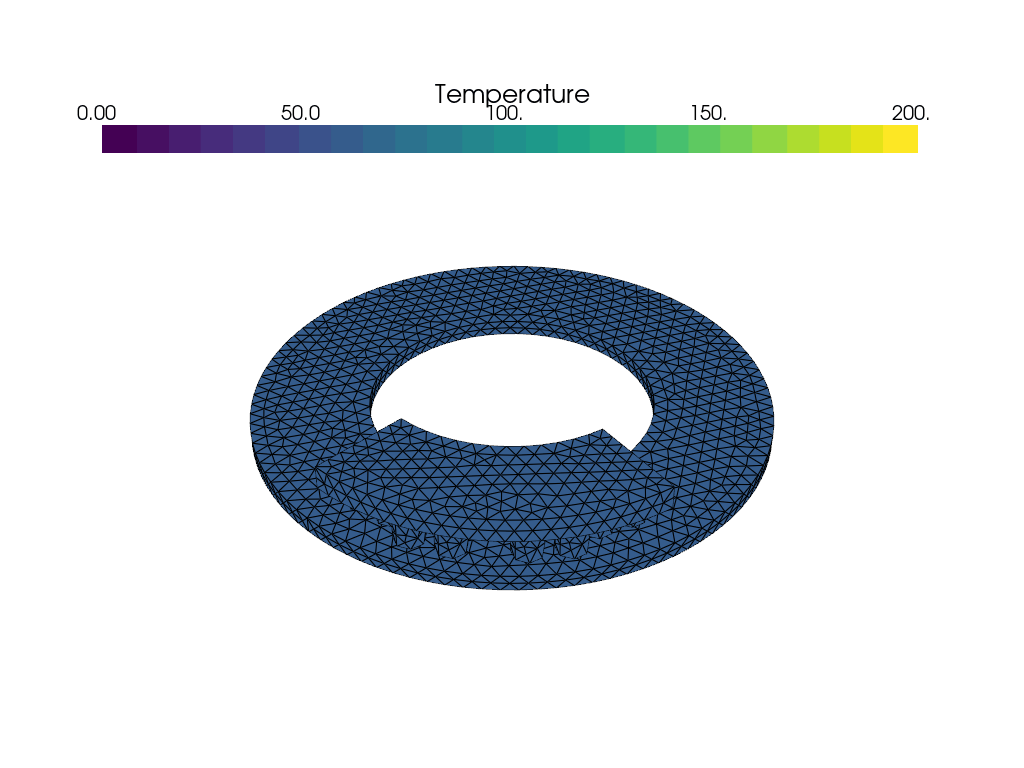

In [2]:
from IPython.display import display, Image
display(Image(gif_name))

# 2 Deformation


Length of mesh points is  2532
Length of result T is  2532

Brake pad nodes number is  840
The file 'm-3-20-2.msh' exists, start creat now:
Info    : Reading 'm-3-20-2.msh'...
Info    : 153 entities
Info    : 842 nodes
Info    : 2405 elements
Info    : Done reading 'm-3-20-2.msh'

length from new mesh is:
 842
length from calculation is:
 840
Temperatures assigned to new mesh length is:
 842


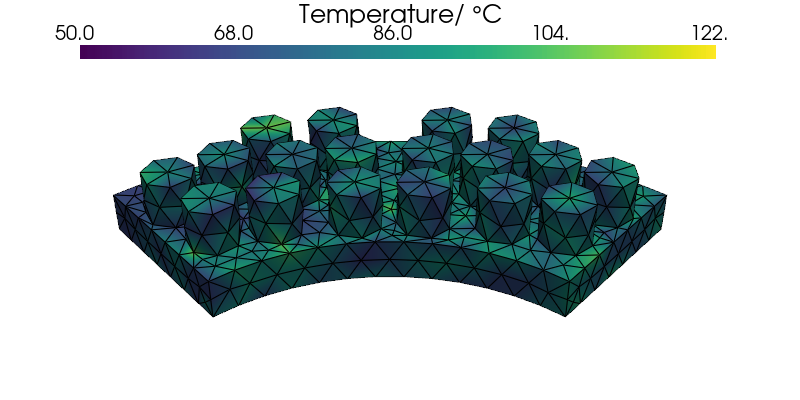

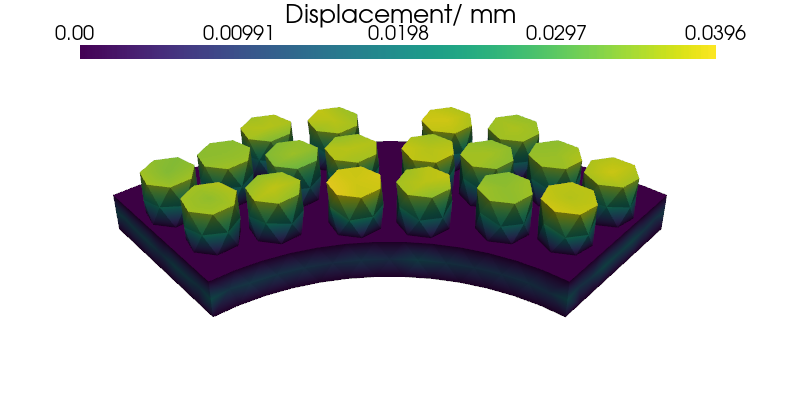

In [3]:
from dolfinx import log

log.set_log_level(log.LogLevel.ERROR)  # Disable INFO and lower logs

T_new_p, domain_pad = T_pad_transfer( mesh_name1, u_n, mesh_min, mesh_max, mesh_brake, pad_v_tag);
plotter             = plot_T_pad( domain_pad, T_new_p)
plotter.show()
figure = plotter.screenshot("T_pad.png")

VT      = fem.functionspace(domain_pad, ("CG", 1))    #define the finite element function space
Delta_T = fem.Function(VT, name ="Temperature_variation")  # T_ is the test function, like v
for i in range(len(T_new_p)):
    Delta_T.vector.array[i] = T_new_p[i]

#######try to make domain only for brake pad.
E    = fem.Constant(domain_pad, 50e3)             # Elastic module
nu   = fem.Constant(domain_pad, 0.2)             # Poission ratio
gdim = domain_pad.geometry.dim

mu    = E / 2 / (1 + nu)                      # Shear modulus
lmbda = E * nu / (1 + nu) / (1 - 2 * nu)   # Lame parameters
alpha = fem.Constant(domain_pad, 1e-5)         # Thermal expansion coefficient
f1    = fem.Constant(domain_pad, (0.0, 0.0, 0.0))       # O for external force

def eps(v):                                # epsilon, strain, the deforamtion, dy/y 
    return ufl.sym(ufl.grad(v))

def sigma(v, Delta_T):                     # sigmathis is sigma
    return (lmbda * ufl.tr(eps(v)) - alpha * (3 * lmbda + 2 * mu) * Delta_T 
    ) * ufl.Identity(gdim)  + 2.0 * mu * eps(v)     # here braces is important, can not be in above line

Vu = fem.functionspace(domain_pad, ("CG", 1, (gdim,))) 
du = ufl.TrialFunction(Vu)
u_ = ufl.TestFunction(Vu)

Wint = ufl.inner(sigma(du, Delta_T), eps(u_)) * ufl.dx  # here du is unkown
aM   = ufl.lhs(Wint)                                      # Wint is long and lhs can help to distinguish unkown and know.
LM   = ufl.rhs(Wint) + ufl.inner(f1, u_) * ufl.dx         # knows parameters are in lhs

def up_side(x):
    return np.logical_or(np.isclose(x[2], 53), np.isclose(x[2], 83))
    
up_dofs_u = fem.locate_dofs_geometrical(Vu, up_side) # lateral sides of domain
bcu       = [fem.dirichletbc(np.zeros((gdim,)), up_dofs_u, Vu)]  # displacement Vu is fixed in lateral sides

u_d     = fem.Function(Vu, name="Displacement")
problem = fem.petsc.LinearProblem(aM, LM, u=u_d, bcs=bcu)
problem.solve()

plot_s_pad = plot_S_pad(Vu,u_d )
plot_s_pad.show()
figure = plot_s_pad.screenshot("T_pad.png")